In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('charts.csv')

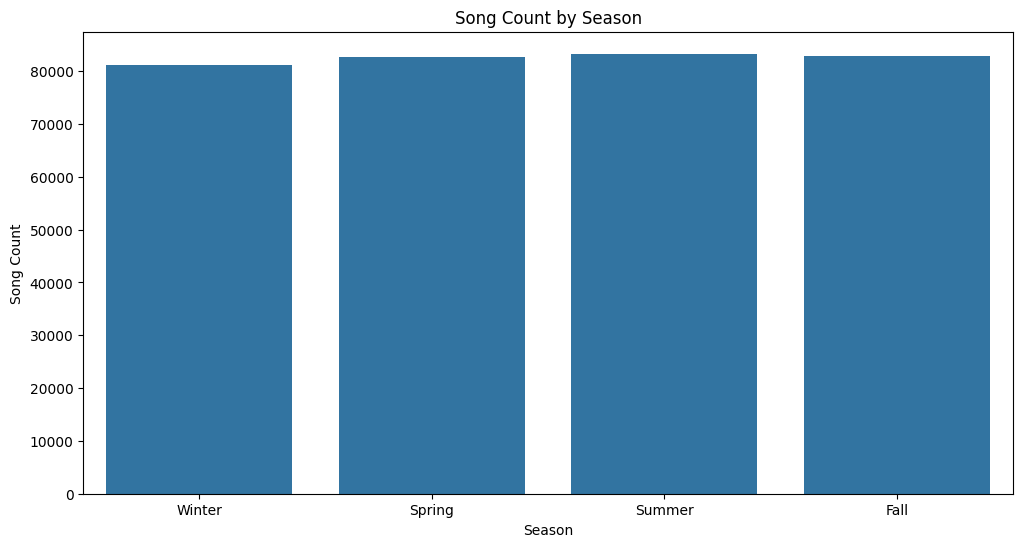

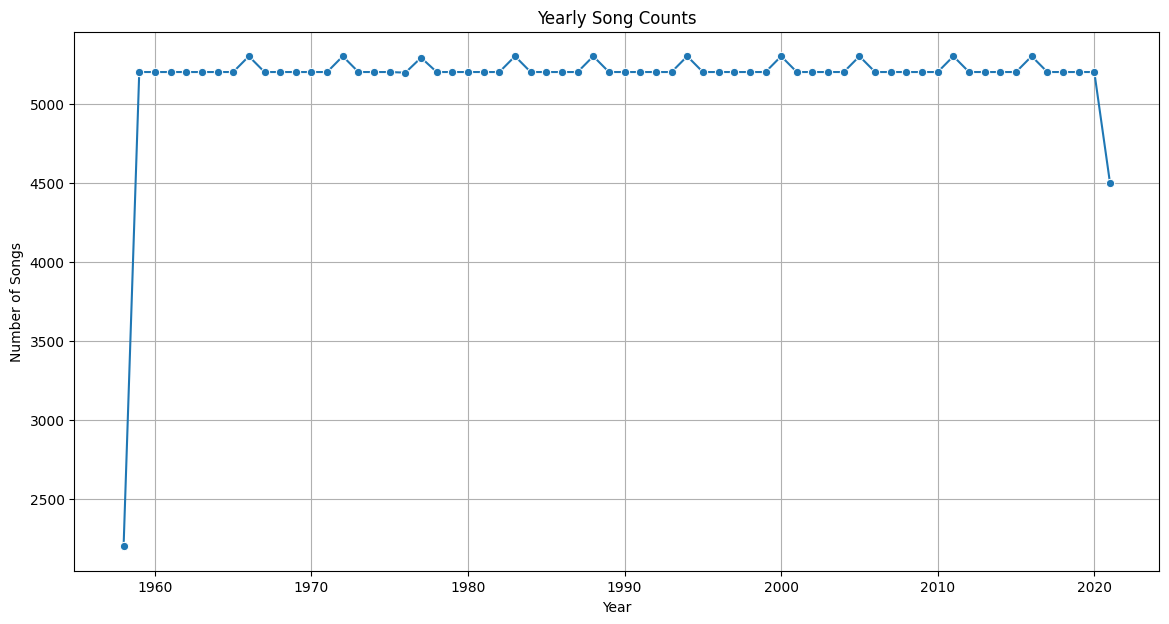

(season
 Fall      82900
 Spring    82699
 Summer    83300
 Winter    81188
 Name: song, dtype: int64,
 year
 1958    2200
 1959    5200
 1960    5200
 1961    5200
 1962    5200
         ... 
 2017    5200
 2018    5200
 2019    5200
 2020    5200
 2021    4500
 Name: song, Length: 64, dtype: int64)

In [2]:
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['season'] = data['month'].apply(get_season)

winter_data = data[data['season'] == 'Winter']
spring_data = data[data['season'] == 'Spring']
summer_data = data[data['season'] == 'Summer']
fall_data = data[data['season'] == 'Fall']

yearly_counts = data.groupby('year').size().reset_index(name='song_count')

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='season', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Song Count by Season')
plt.xlabel('Season')
plt.ylabel('Song Count')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_counts, x='year', y='song_count', marker='o')
plt.title('Yearly Song Counts')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

season_summary = data.groupby('season')['song'].count()
year_summary = data.groupby('year')['song'].count()

season_summary, year_summary

# Quantitative Questions

## Question One
What is the average amount of weeks that an artist spends on the charts?

In [3]:
artist_weeks = data.groupby('artist')['weeks-on-board'].sum()

total_weeks = sum(artist_weeks)
total_artists = len(artist_weeks)
average_weeks = total_weeks / total_artists

print(f"Total weeks across all artists: {total_weeks}")
print(f"Total number of artists: {total_artists}")
print(f"Average weeks an artist spends on the charts: {average_weeks}")

Total weeks across all artists: 3024186
Total number of artists: 10205
Average weeks an artist spends on the charts: 296.3435570798628


## Question Two
How long does a song spend on average stay on the charts?

In [4]:
total = 0
for i in data['weeks-on-board']:
  total += i
print(f"Total weeks across all songs {total}")
rows = len(data)
print(f"Total number of songs: {rows}")
avg = total/rows
print(f"Average weeks a song spends on the charts: {avg}")

Total weeks across all songs 3024186
Total number of songs: 330087
Average weeks a song spends on the charts: 9.161784620418253


## Question Three
Which artist has spent the most time on the charts?

In [5]:
artist_totals = data.groupby('artist')['weeks-on-board'].sum()

max_weeks = 0
top_artist = ''

for artist, weeks in artist_totals.items():
    if weeks > max_weeks:
        max_weeks = weeks
        top_artist = artist

print("Artist with the most time on the charts:", top_artist)
print("Total weeks:", max_weeks)

Artist with the most time on the charts: Taylor Swift
Total weeks: 13689


### Follow up questions:
who has spent the average amount on the charts \
who has spent the least amount on the charts

In [6]:
#What genres have trended upwards or downwards?

In [7]:
#What is the song length from 1920 to 2020? How has it correlated with a collective loss of societal attention  span?
#How has the nature of the charts changed(variety of artists)?
#Is CONYGPT A chat gpt with AI Mr.CLL quotes?




## Question Four
Which song has spent the most time on the charts?

In [8]:
song_totals = data.groupby('song')['weeks-on-board'].sum()

max_weeks = 0
top_song = ''

for song, weeks in song_totals.items():
    if weeks > max_weeks:
        max_weeks = weeks
        top_song = song

print("Song with the most time on the charts:", top_song)
print("Total weeks:", max_weeks)

Song with the most time on the charts: Blinding Lights
Total weeks: 4095


### Follow up questions:
which one has spent the average amount on the charts \
which has spent the least amount on the charts

# Qualitative Questions

# Question One
Why does the amount of songs made per year increase at the middle of each decade?

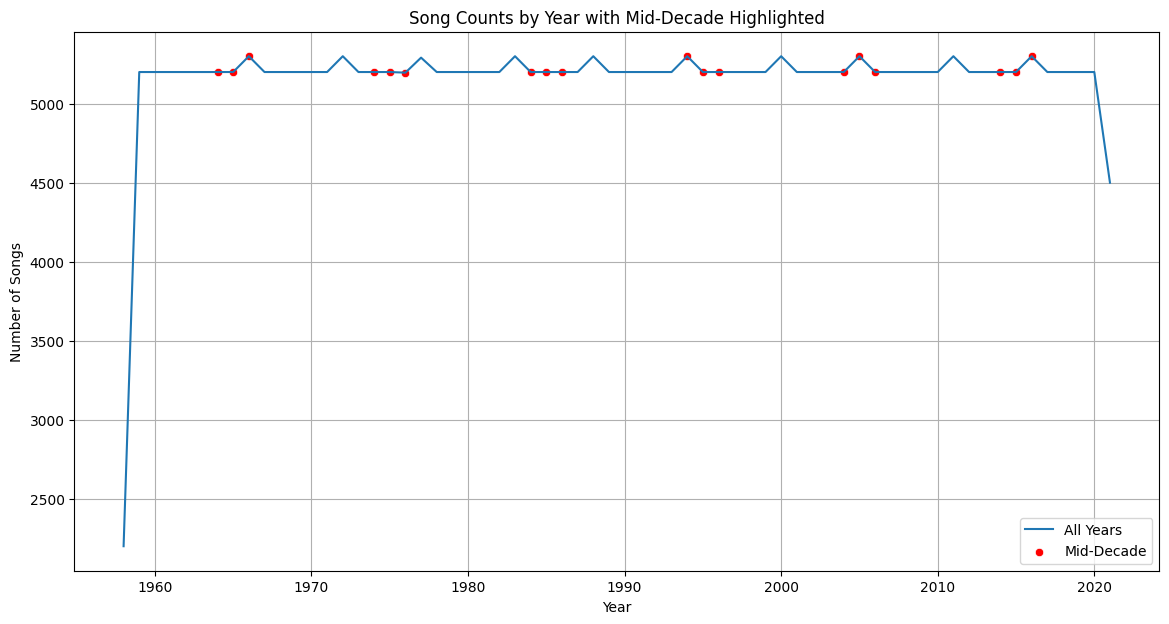

In [9]:
yearly_song_counts = data.groupby('year').size().reset_index(name='song_count')

middle_decades = [year for year in yearly_song_counts['year'] if year % 10 in [4, 5, 6]]

middle_decade_counts = yearly_song_counts[yearly_song_counts['year'].isin(middle_decades)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_song_counts, x='year', y='song_count', label="All Years")
sns.scatterplot(data=middle_decade_counts, x='year', y='song_count', color='red', label="Mid-Decade")
plt.title("Song Counts by Year with Mid-Decade Highlighted")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.legend()
plt.grid(True)
plt.show()

Here's a discussion (specifically the first comment) that explains this phenomenon:

[Using decades to describe music and when it doesn't work | Reddit](https://www.reddit.com/r/LetsTalkMusic/comments/lreqzf/lets_talk_using_decades_to_describe_music_and/) \

It's not necessarily something that has a single cause. It's just a trend that music tends to follow. It isn't consistantly the middle year of the decade, but is sometimes in that area. It is usually that something culturally important for music just so happens to occur in those years.

## Question Two
Do collaborations between artists influence chart longevity or peak rank?

In [10]:
data['is_collaboration'] = data['artist'].str.contains("&", case=False, na=False)

collaboration_stats = data.groupby('is_collaboration').agg({
    'rank': ['mean', 'min', 'max'],
    'weeks-on-board': ['mean', 'min', 'max']
}).reset_index()

print("\nCollaboration vs Non-Collaboration Stats:")
print(collaboration_stats)

correlation = data[['is_collaboration', 'rank', 'weeks-on-board']].corr()

print("\nCorrelation Matrix:")
print(correlation)


Collaboration vs Non-Collaboration Stats:
  is_collaboration       rank          weeks-on-board        
                         mean min  max           mean min max
0            False  50.628137   1  100       9.152418   1  90
1             True  48.958895   1  100       9.275333   1  68

Correlation Matrix:
                  is_collaboration      rank  weeks-on-board
is_collaboration          1.000000 -0.015343        0.004281
rank                     -0.015343  1.000000       -0.327456
weeks-on-board            0.004281 -0.327456        1.000000


**Non-Collaborations:** The average rank is 50.63, with a min of 1 and max of 100.

**Collaborations:** The average rank is 48.96, with the same min (1) and max (100).

Collaborations have a slightly higher average duration on the chart (9.28 weeks) compared to non-collaborations (9.15 weeks). However, collaborations tend to have a slightly smaller maximum duration (68 weeks vs. 90 weeks).

<ipython-input-11-f9ed8d0787fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_collaboration', y='rank', data=data, ax=axes[0], palette="muted")
<ipython-input-11-f9ed8d0787fd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_collaboration', y='weeks-on-board', data=data, ax=axes[1], palette="muted")


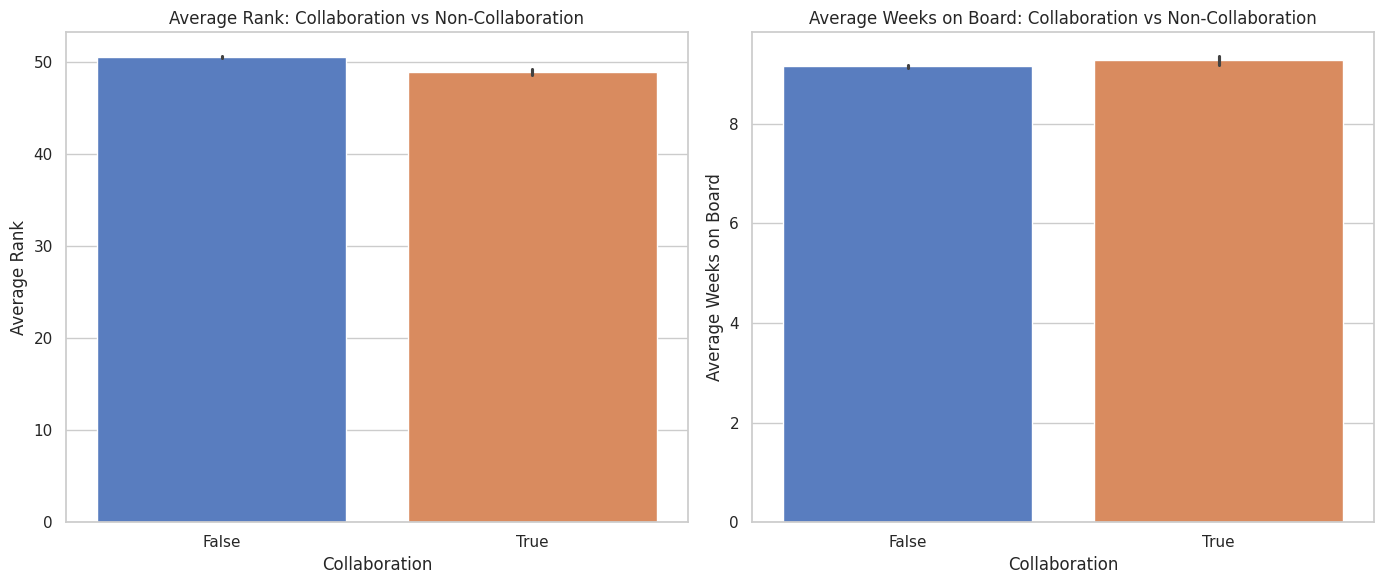

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='is_collaboration', y='rank', data=data, ax=axes[0], palette="muted")
axes[0].set_title('Average Rank: Collaboration vs Non-Collaboration')
axes[0].set_xlabel('Collaboration')
axes[0].set_ylabel('Average Rank')

sns.barplot(x='is_collaboration', y='weeks-on-board', data=data, ax=axes[1], palette="muted")
axes[1].set_title('Average Weeks on Board: Collaboration vs Non-Collaboration')
axes[1].set_xlabel('Collaboration')
axes[1].set_ylabel('Average Weeks on Board')

plt.tight_layout()
plt.show()

## Question Three
What is the seasonal impact on collaboration success?

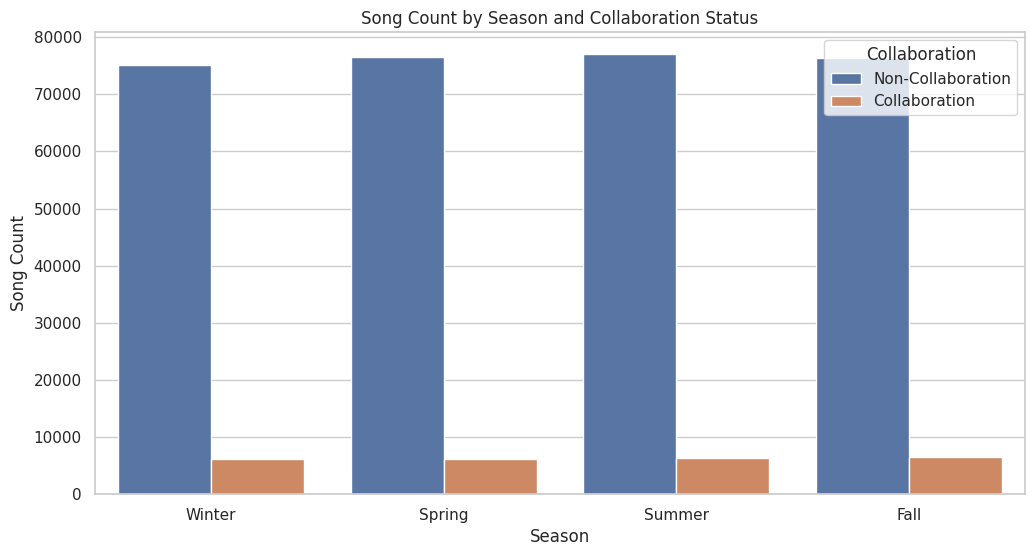

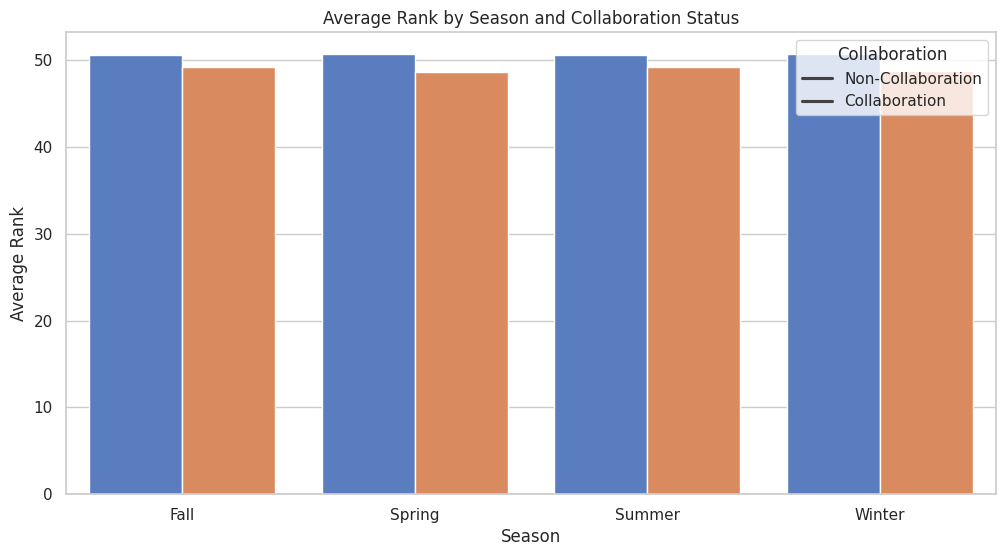

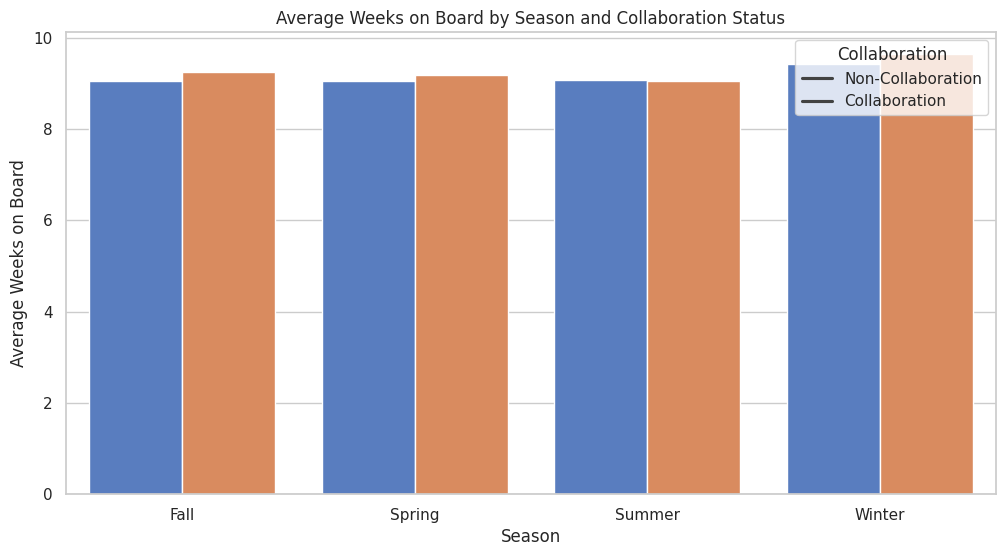

Seasonal Collaboration Summary:
   season  is_collaboration  song_count
0    Fall             False       76358
1    Fall              True        6542
2  Spring             False       76533
3  Spring              True        6166
4  Summer             False       76998
5  Summer              True        6302
6  Winter             False       75043
7  Winter              True        6145

Seasonal Performance Summary (Avg Rank and Weeks on Board):
   season  is_collaboration       rank  weeks-on-board
0    Fall             False  50.609930        9.056222
1    Fall              True  49.218435        9.238459
2  Spring             False  50.649445        9.051782
3  Spring              True  48.642394        9.177911
4  Summer             False  50.603925        9.079911
5  Summer              True  49.233418        9.055538
6  Winter             False  50.649774        9.427328
7  Winter              True  48.718633        9.637754


In [12]:
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['season'] = data['month'].apply(get_season)

data['is_collaboration'] = data['artist'].str.contains("&", case=False, na=False)

season_collaboration_summary = data.groupby(['season', 'is_collaboration']).size().reset_index(name='song_count')

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='season', hue='is_collaboration', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Song Count by Season and Collaboration Status')
plt.xlabel('Season')
plt.ylabel('Song Count')
plt.legend(title="Collaboration", labels=["Non-Collaboration", "Collaboration"])
plt.show()

season_performance_summary = data.groupby(['season', 'is_collaboration']).agg({
    'rank': 'mean',
    'weeks-on-board': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=season_performance_summary, x='season', y='rank', hue='is_collaboration', palette='muted')
plt.title('Average Rank by Season and Collaboration Status')
plt.xlabel('Season')
plt.ylabel('Average Rank')
plt.legend(title="Collaboration", labels=["Non-Collaboration", "Collaboration"])
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=season_performance_summary, x='season', y='weeks-on-board', hue='is_collaboration', palette='muted')
plt.title('Average Weeks on Board by Season and Collaboration Status')
plt.xlabel('Season')
plt.ylabel('Average Weeks on Board')
plt.legend(title="Collaboration", labels=["Non-Collaboration", "Collaboration"])
plt.show()

print("Seasonal Collaboration Summary:")
print(season_collaboration_summary)

print("\nSeasonal Performance Summary (Avg Rank and Weeks on Board):")
print(season_performance_summary)

**Collaboration Frequency:** Collaborations are less frequent than non-collaborations, but they perform better in terms of average rank and chart longevity. \
**Winter Advantage:** Collaborations tend to perform the best in Winter, with both higher average rank and longer chart life. \
**Consistency Across Seasons:** While collaborations generally perform better than non-collaborations, the differences in performance are fairly consistent across seasons. However, Winter shows the most pronounced advantage for collaborations.